In [1]:
import os
import pickle
import random
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
path = os.environ.get("PATH")
additional_path_PC = 'C:\\Users\\Michi\\Anaconda3\\envs\\python_v3-8;C:\\Users\\Michi\\Anaconda3\\envs\\python_v3-8\\Library\\mingw-w64\\bin;C:\\Users\\Michi\\Anaconda3\\envs\\python_v3-8\\Library\\usr\\bin;C:\\Users\\Michi\\Anaconda3\\envs\\python_v3-8\\Library\\bin;C:\\Users\\Michi\\Anaconda3\\envs\\python_v3-8\\Scripts;C:\\Users\\Michi\\Anaconda3\\envs\\python_v3-8\\bin;C:\\Users\\Michi\\Anaconda3\\condabin'
additional_path_laptop = "C:\\Users\\micha\\anaconda3\\envs\\ai38;C:\\Users\\micha\\anaconda3\\envs\\ai38\\Library\\mingw-w64\\bin;C:\\Users\\micha\\anaconda3\\envs\\ai38\\Library\\usr\\bin;C:\\Users\\micha\\anaconda3\\envs\\ai38\\Library\\bin;C:\\Users\\micha\\anaconda3\\envs\\ai38\\Scripts;C:\\Users\\micha\\anaconda3\\envs\\ai38\\bin;C:\\Users\\micha\\anaconda3\\condabin;"

min_additional_path_PC = "C:\\Users\\Michi\\Anaconda3\\envs\\python_v3-8\\Library\\bin;"
additional_path_laptop = "C:\\Users\\micha\\anaconda3\\envs\\ai38\\Library\\bin;"

combined_path = min_additional_path_PC + additional_path_laptop + path
os.environ["PATH"] = combined_path

In [3]:
def show_mfcc_distribution_of_participant(participant_idx=0, starting_mfcc=1):
    participant = participants[participant_idx]
    mfccs = participant.heavy_cough.get_MFCCs()
    #elimiate the timesteps with only zeros in time domain
    mfccs = mfccs[:,np.abs(mfccs[1:, :]).sum(axis=0) > 5]
    bins = np.linspace(np.min(mfccs), np.max(mfccs), 50)
    bins = np.linspace(-600, 150, 50)
    bins = np.linspace(-100, 150, 50)

    plt.rcParams["figure.autolayout"] = True
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,7))
    for n, ax in enumerate(axes.ravel()):
        ax.hist(mfccs[n+starting_mfcc,:], bins=bins, log=False)
        ax.set_title(f"MFCC #{n+starting_mfcc}")

In [4]:
def get_participant_mfccs_without_silence(participant):
    mfccs = participant.heavy_cough.MFCCs
    mfccs = mfccs[:,np.abs(mfccs[1:, :]).sum(axis=0) > 5]
    return mfccs

def statistics_from_mfccs(mfccs):
    bin_mean = mfccs.mean(axis=1)
    bin_std = mfccs.std(axis=1)
    return np.expand_dims(bin_mean, axis=1), np.expand_dims(bin_std, axis=1)

In [5]:
root_dir = "python"
_, current_folder = os.path.split(os.getcwd())
if current_folder != root_dir:
    os.chdir("../")
    
os.getcwd()

'C:\\Michi\\acoustic_covid_detection\\python'

In [6]:
DATA_PATH = "data/Coswara_processed/pickles/participant_objects.pickle"
with open(DATA_PATH, "rb") as f:
    participants = pickle.load(f)

941


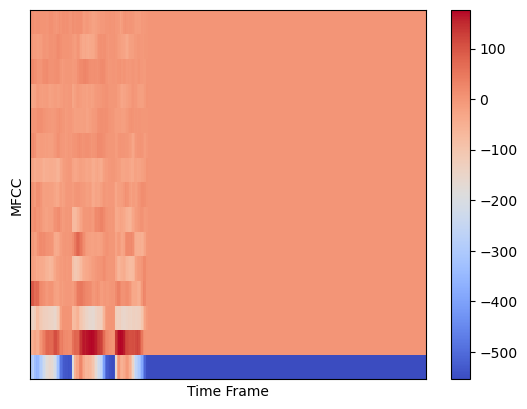

In [7]:
#participant = random.choice(participants)
idx = random.randint(0,2700)
# reproducible participant with zeros padded --> constant mfccs
idx = 941

print(idx)
participant = participants[idx]
participant.heavy_cough.show_MFCCs()

In [8]:
mfccs = participant.heavy_cough.get_MFCCs()
print(mfccs.shape)
# values of a timestep that was just zeros in the time domain
print(mfccs[:, 158])

(15, 259)
[-554.3269    0.        0.        0.        0.        0.        0.
    0.        0.        0.        0.        0.        0.        0.
    0.    ]


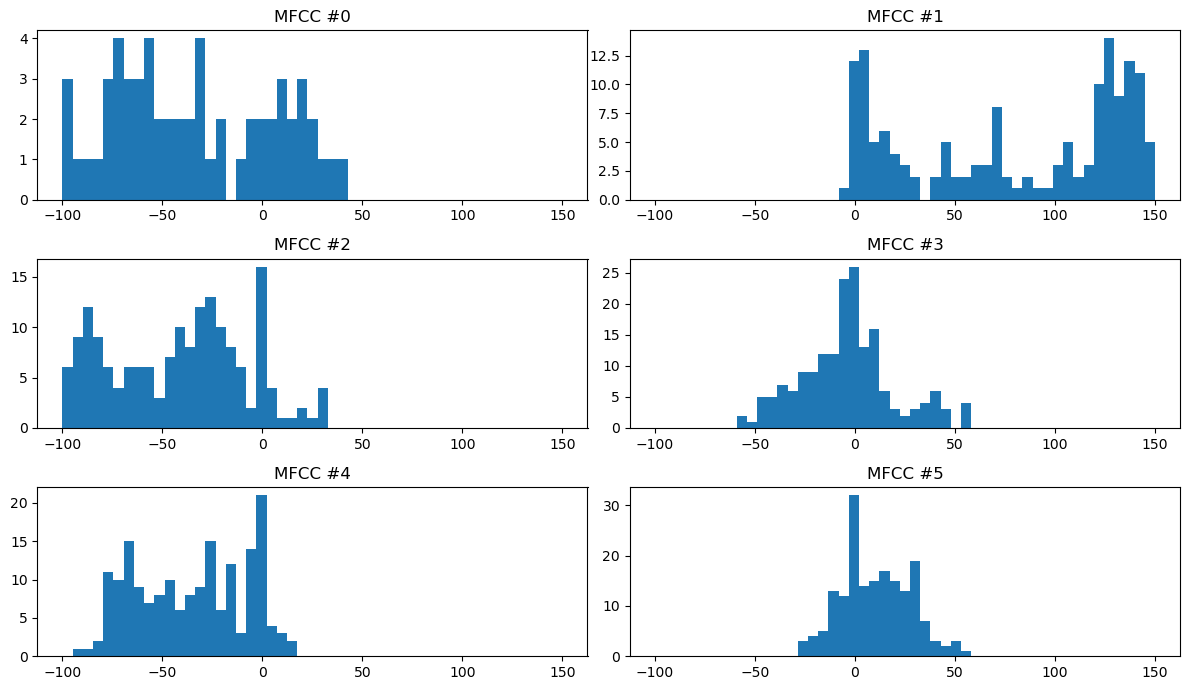

In [9]:
# bin zero is outside these plots. it starts at -600 already
idx=random.randint(0, len(participants)-1)
show_mfcc_distribution_of_participant(participant_idx=idx, starting_mfcc=0)

'0th mfcc bin ovcer time steps'

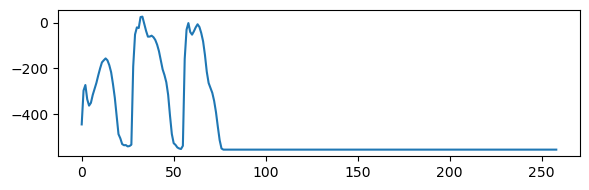

In [10]:
plt.figure(figsize=(6,2)), plt.plot(mfccs[0,:])
"0th mfcc bin ovcer time steps"

# Calculate statistics
collect all timesteps for the mfccs bins and then calculate mean and std over each bin

or

calculate a mean and std for each participant separately (and later calculate a mean of those means and stds)

In [11]:
all_mfccs = np.empty((15,1))
all_means = np.empty((15,1))
all_stds = np.empty((15,1))
for i, participant in enumerate(participants):
    clear_output(wait=True)
    print(f"{i+1} / {len(participants)}")
    mfcc = get_participant_mfccs_without_silence(participant)
    mu, sigma = statistics_from_mfccs(mfcc)
    all_mfccs = np.append(all_mfccs, mfcc, axis=1)
    all_means = np.append(all_means, mu, axis=1)
    all_stds = np.append(all_stds, sigma, axis=1)

# remove crazy outliers    
all_mfccs = all_mfccs[:, all_mfccs[0,:] > -1000]

overall_mean = all_mfccs.mean(axis=1)
overall_std = all_mfccs.std(axis=1)
overall_mean, overall_std

2648 / 2648


(array([-337.54049317,   74.14144005,  -25.49025431,   12.97842769,
         -17.78455804,    5.06947846,  -17.14681515,   -9.36838393,
         -13.06478775,   -4.86932854,   -4.81544886,   -9.10165061,
          -2.58432672,   -7.08837537,   -4.03149279]),
 array([184.63337071,  55.88419009,  44.66785375,  28.65932612,
         29.94808686,  22.27000562,  23.15684845,  17.47263035,
         17.42046795,  15.06544801,  13.35636274,  13.49946763,
         12.31123419,  12.98806581,  11.22761067]))

In [12]:
all_mfccs.shape, all_stds.shape, all_means.shape

((15, 452451), (15, 2649), (15, 2649))

In [13]:
mean_of_means = all_means.mean(axis=1)
mean_of_stds = all_stds.mean(axis=1)

mean_of_means, mean_of_stds

(array([-331.8088829 ,   76.27818569,  -27.14741478,   13.73242134,
         -18.947122  ,    5.17366088,  -17.84465224,   -9.72679361,
         -13.32108061,   -5.40028472,   -4.9847684 ,   -9.45703841,
          -2.59112499,   -7.62946805,   -4.11888636]),
 array([166.98202829,  47.80791132,  37.20069457,  23.26379328,
         24.13115699,  17.50971507,  18.8768299 ,  14.22171239,
         14.36668731,  12.13266992,  11.13963721,  11.35840227,
         10.25239385,  10.72223476,   9.42287716]))

([<matplotlib.lines.Line2D at 0x1beee9638b0>],
 [<matplotlib.lines.Line2D at 0x1beee963d00>])

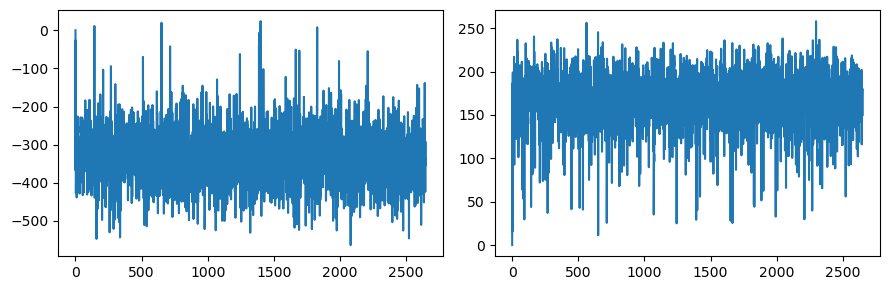

In [14]:
mfcc_bin = 0

fig, ax = plt.subplots(1, 2, figsize=(9, 3))
ax[0].plot(all_means[mfcc_bin,:]), ax[1].plot(all_stds[mfcc_bin,:])

mfccs bin 0 statistics calculated from all timesteps - mean:-337.54 - std:184.63
mfccs bin 0 statistics calculated from all participants - mean:-331.81 - std:166.98


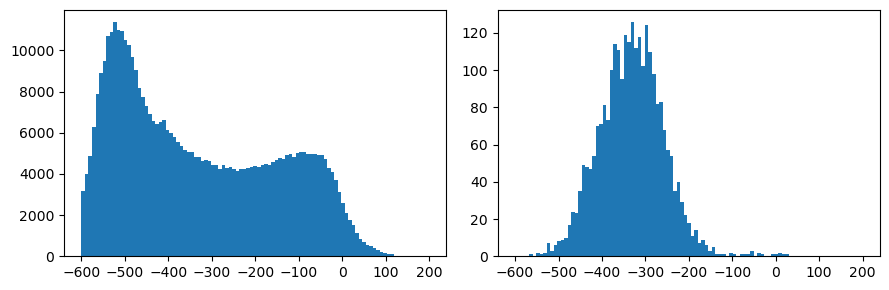

In [15]:
bins = np.linspace(-600, 200, 100)
fig, ax = plt.subplots(1, 2, figsize=(9, 3))
ax[0].hist(all_mfccs[mfcc_bin,:], bins), ax[1].hist(all_means[mfcc_bin,:], bins)
print(f"mfccs bin {mfcc_bin} statistics calculated from all timesteps - mean:{round(overall_mean[mfcc_bin],2)} - std:{round(overall_std[mfcc_bin], 2)}")
print(f"mfccs bin {mfcc_bin} statistics calculated from all participants - mean:{round(mean_of_means[mfcc_bin], 2)} - std:{round(mean_of_stds[mfcc_bin], 2)}")

# Testing the normalization on a single example

In [16]:
mfccs = get_participant_mfccs_without_silence(participants[random.randint(0,2700)])
mfccs[:,1], mean_of_means

(array([-5.3657098e+02, -5.1502483e+01,  2.5341895e-01,  3.7443069e+01,
        -3.7025406e+01,  1.3405794e+01,  3.8889885e-02,  6.3099270e+00,
        -2.1735445e+01,  2.0091969e+01, -1.4006824e+00, -1.8741356e+01,
         2.3651463e+01, -1.1629493e+01,  8.4916997e-01], dtype=float32),
 array([-331.8088829 ,   76.27818569,  -27.14741478,   13.73242134,
         -18.947122  ,    5.17366088,  -17.84465224,   -9.72679361,
         -13.32108061,   -5.40028472,   -4.9847684 ,   -9.45703841,
          -2.59112499,   -7.62946805,   -4.11888636]))

In [17]:
mfccs_zero_mean = (mfccs - np.expand_dims(mean_of_means, axis=1))
mfccs_normalized =  mfccs_zero_mean / np.expand_dims(mean_of_stds, axis=1)

'0. mfcc bin distribution before and after normalization'

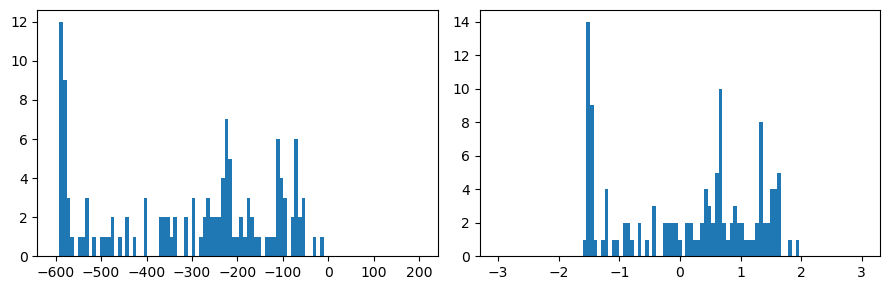

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(9, 3))
ax[0].hist(mfccs[mfcc_bin,:], bins)
ax[1].hist(mfccs_normalized[mfcc_bin,:], np.linspace(-3, 3, 100))
f"{mfcc_bin}. mfcc bin distribution before and after normalization"

In [55]:
np.save("Data/Coswara_processed/pickles/mean_cough_heavy_15MFCCs.npy", mean_of_means)

In [56]:
np.save("Data/Coswara_processed/pickles/stds_cough_heavy_15MFCCs.npy", mean_of_stds)

# check audio recording qualities
### it is veery necessary to ignore NaN (and recording quality == 0) recordings because there isnt even any cough on there very often

In [78]:
participant_stats = {}
ratios = np.zeros(len(participants_good_audio))
for i, participant in enumerate(participants_good_audio):
    print(participant.id)
    clear_output(wait=True)
    mfccs = participant.heavy_cough.MFCCs
    mfcc_bin_zero = mfccs[0,:]
    mfcc_ratio = np.max(mfcc_bin_zero) - np.min(mfcc_bin_zero) 
    ratios[i] = mfcc_ratio
    participant_stats[participant.id] = mfcc_ratio

zzh7tK9CrZacOddJTG9YQwCZz4f2


''

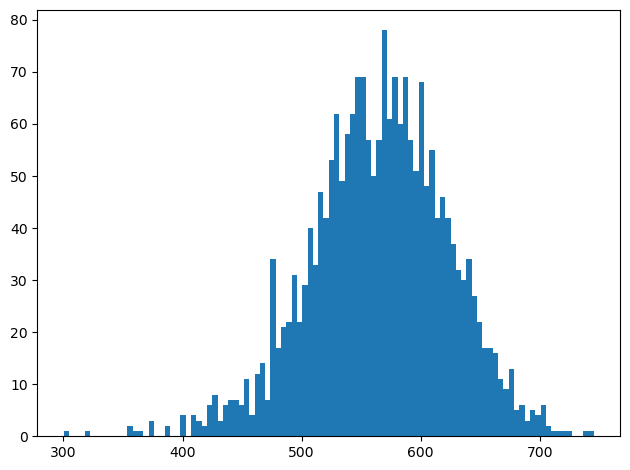

In [79]:
plt.hist(ratios, 100)
""

''

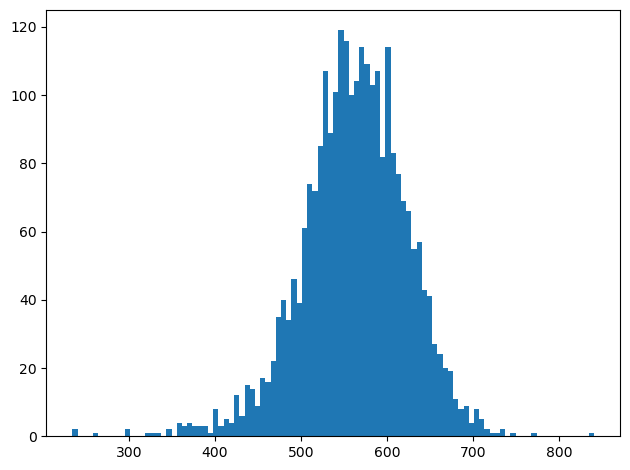

In [45]:
plt.hist(ratios, 100)
""

In [80]:
for idx, value in participant_stats.items():
    if value < 350:
        print(idx)

uAEOVPr487bFnks4dvytsxJQZP02
WifTQoZzOTcQ53HiZNJUQOXehde2


In [49]:
import pandas as pd

In [57]:
def get_participant_by_id(user_id):
    for participant in participants:
        if user_id == participant.id:
            return participant
    else:
        print("no such user ID in database")

In [86]:
bad_id = "WifTQoZzOTcQ53HiZNJUQOXehde2"

metadata = pd.read_csv("data/Coswara_processed/full_meta_data.csv")
audio_quality = pd.read_csv("data/Coswara_processed/audio_quality_annotations_df.csv")

metadata[metadata["user_id"] == bad_id]
audio_quality[audio_quality["user_id"] == bad_id]



,user_id,audio_quality_deep_breathing,audio_quality_shallow_breathing,audio_quality_heavy_cough,audio_quality_shallow_cough,audio_quality_counting_fast,audio_quality_counting_normal,audio_quality_vowel_a,audio_quality_vowel_e,audio_quality_vowel_o
2428,WifTQoZzOTcQ53HiZNJUQOXehde2,0,1,2.0,1.0,2.0,2.0,2.0,2,0.0


In [87]:
bad_participant = get_participant_by_id(bad_id)
bad_participant.heavy_cough.play_audio(False)


In [88]:
bad_participant.meta_data

{'user_id': 'WifTQoZzOTcQ53HiZNJUQOXehde2',
 'age': 23,
 'covid_health_status': 'healthy',
 'record_date': '2020-10-22',
 'english_proficiency': 'y',
 'gender': 'male',
 'country': 'India',
 'local_region': 'Thane',
 'state': 'Maharashtra',
 'returning_user': 'n',
 'smoker': 'True',
 'cold': nan,
 'hypertension': nan,
 'diabetes': nan,
 'cough': True,
 'date_of_ct_scan': nan,
 'has_taken_ct_scan': nan,
 'ct_score': nan,
 'diarrheoa': nan,
 'fever': nan,
 'loss_of_smell': nan,
 'muscle_pain': nan,
 'type_of_covid_test': nan,
 'covid_test_date': nan,
 'covid_test_result': 'na',
 'was_using_mask': 'n',
 'vaccination_status': nan,
 'breathing_difficulties': nan,
 'other_respiratory_illness': nan,
 'fatigue': nan,
 'sore_throat': nan,
 'ischemic_heart_disease': nan,
 'asthma': nan,
 'other_preexisting_condition': nan,
 'chronic_lung_disease': nan,
 'pneumonia': nan,
 'recording_error': nan,
 'audio_quality_deep_breathing': 0,
 'audio_quality_shallow_breathing': 1,
 'audio_quality_heavy_coug

In [89]:
participants_good_audio = [participant for participant in participants if
                           participant.meta_data["audio_quality_heavy_cough"] > 0.0]

In [90]:
qualities = np.zeros(len(participants_good_audio))
for idx, participant in enumerate(participants_good_audio):
    
    qualities[idx] = participant.meta_data["audio_quality_heavy_cough"]

In [91]:
audio_quality["audio_quality_heavy_cough"].value_counts()

2.0    1927
1.0     167
0.0     139
Name: audio_quality_heavy_cough, dtype: int64

In [76]:
np.unique(qualities, return_counts=True)

(array([1., 2.]), array([ 167, 1920], dtype=int64))